# Machine Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|...|...|...|
|...|...|...|
|...|...|...|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)
    - [K-Nearest Neighbours](#k-nearest-neighbors)
    - [Logistic Regression](#logistic-regression)
    - [SVM](#svm)
    - [Decision Tree](#decision-tree)
    - [Ensembles](#ensembles)
        - [Random Forest](#random-forest)
        - [Gradient Boosted Decision Trees](#gradient-boosted-decision-trees)
        - [XGBoost](#xgboost)
    - [Self-Assembled Ensemble](#self-assembled-ensemble)
- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [1]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Data Overview

In [3]:
print('Train Data')
display(train.head(10))
print('Test Data')
display(test.head(10))

Train Data


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,...,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,...,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,...,False,False,True,False,True,False,True,False,False,0
5,12802,68.0,1,0,80.45,28.8,True,False,False,False,...,False,False,False,False,True,False,False,False,False,0
6,67237,23.0,0,0,65.44,31.1,True,False,False,True,...,False,True,False,False,False,True,False,True,False,0
7,41946,41.0,0,0,73.86,27.2,True,False,False,False,...,False,True,False,False,False,True,False,False,True,0
8,30324,79.0,0,0,76.47,33.2,True,False,False,False,...,False,True,False,False,True,False,True,False,False,0
9,56696,65.0,0,0,91.03,24.7,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0


Test Data


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,32840,52.0,0,0,97.32,21.8,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1,45158,30.0,0,0,227.99,47.7,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
2,56105,26.0,0,0,113.28,24.4,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
3,3112,24.0,0,0,79.15,21.0,True,False,False,False,...,False,False,True,False,False,False,True,True,False,False
4,35224,63.0,0,0,89.69,33.3,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
5,33344,43.0,0,1,96.93,29.6,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True
6,35699,16.0,0,0,82.25,30.9,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
7,48440,38.0,0,0,78.90,25.3,True,False,False,True,...,True,False,False,False,False,True,False,False,True,False
8,32256,23.0,0,0,72.60,31.2,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
9,18285,6.0,0,0,95.45,17.0,True,False,False,True,...,False,False,False,False,True,True,False,False,False,False


## Exploratory Data Analysis

In [4]:
display(train.describe())
display(test.describe())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,36746.393353,41.815312,0.088137,0.043040,103.587081,28.601216,0.015410
std,20906.519131,22.477423,0.283498,0.202951,42.127396,7.782248,0.123178
min,1.000000,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,18763.250000,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000
50%,36862.000000,43.000000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,54757.500000,59.000000,0.000000,0.000000,111.437500,32.800000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,8388.000000,8388.000000,8388.000000,8388.000000,8388.000000,8388.000000
mean,37094.643777,41.935198,0.085002,0.043395,103.814890,28.620327
std,20955.196907,22.509673,0.278902,0.203758,42.639044,7.721361
min,4.000000,0.080000,0.000000,0.000000,55.000000,10.300000
25%,18877.750000,24.000000,0.000000,0.000000,77.010000,23.200000
50%,37490.000000,43.000000,0.000000,0.000000,91.320000,27.800000
75%,55290.250000,60.000000,0.000000,0.000000,111.665000,33.000000
max,72934.000000,82.000000,1.000000,1.000000,291.050000,80.200000


In [5]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33550 non-null  int64  
 1   age                             33550 non-null  float64
 2   hypertension                    33550 non-null  int64  
 3   heart_disease                   33550 non-null  int64  
 4   avg_glucose_level               33550 non-null  float64
 5   bmi                             33550 non-null  float64
 6   gender_Female                   33550 non-null  bool   
 7   gender_Male                     33550 non-null  bool   
 8   gender_Other                    33550 non-null  bool   
 9   ever_married_No                 33550 non-null  bool   
 10  ever_married_Yes                33550 non-null  bool   
 11  work_type_Govt_job              33550 non-null  bool   
 12  work_type_Never_worked          

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8388 non-null   int64  
 1   age                             8388 non-null   float64
 2   hypertension                    8388 non-null   int64  
 3   heart_disease                   8388 non-null   int64  
 4   avg_glucose_level               8388 non-null   float64
 5   bmi                             8388 non-null   float64
 6   gender_Female                   8388 non-null   bool   
 7   gender_Male                     8388 non-null   bool   
 8   gender_Other                    8388 non-null   bool   
 9   ever_married_No                 8388 non-null   bool   
 10  ever_married_Yes                8388 non-null   bool   
 11  work_type_Govt_job              8388 non-null   bool   
 12  work_type_Never_worked          83

None

**Machine Learning**

De data is verdeeld in numerieke waardes en booleans. Deze booleans kunnen worden omgezet in numerieke waardes. Verder zijn er geen missende waardes in de datasets. Deze datasets voldoen aan de eisen voor het uitvoeren machine learning. 


hypertension--------= Hogebloeddruk. 1:JA, 0:Nee


heart_disease-------= Hartziekte. 1:JA, 0:Nee


avg_glucose_level---= Gemiddelde glucosegehalte


bmi-----------------= Body mass index


Gender--------------= Male, Female, Other


Married-------------= Yes, No


Work type-----------= Government, never worked, self-employed, children(werken met kinderen zoals docent, kinderopvang etc)


Residence type------= Rural(buiten de stad, dorpen), Urban(in de stad)


Smoking status------= Formerly smoked(eerder gerookt), never smoked, smokes(actief)





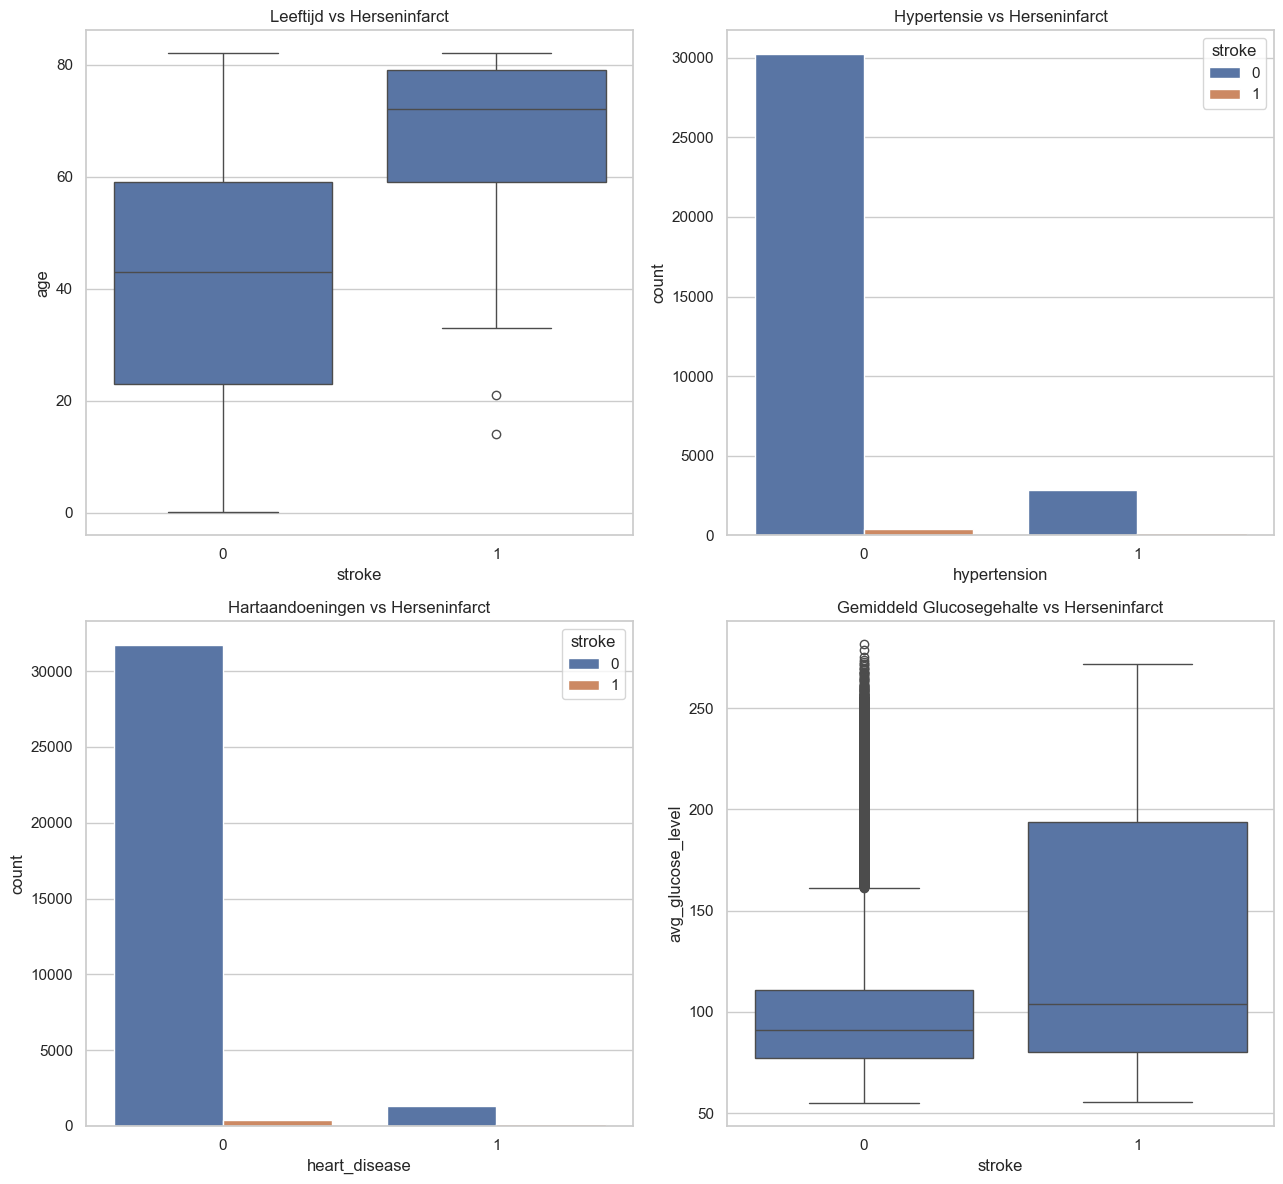

In [6]:
# Hier worden en visualisaties gemaakt over welke variabelen invloed kunnen hebben op herseninfarct. 
sns.set(style="whitegrid")

# Stroke variabel wordt eerst in een categorisch waarde omgezet. 
train['stroke'] = train['stroke'].astype('category')

fig, axs = plt.subplots(2, 2, figsize=(13, 12))

sns.boxplot(x='stroke', y='age', data=train, ax=axs[0, 0])
axs[0, 0].set_title('Leeftijd vs Herseninfarct')

sns.countplot(x='hypertension', hue='stroke', data=train, ax=axs[0, 1])
axs[0, 1].set_title('Hypertensie vs Herseninfarct')

sns.countplot(x='heart_disease', hue='stroke', data=train, ax=axs[1, 0])
axs[1, 0].set_title('Hartaandoeningen vs Herseninfarct')

sns.boxplot(x='stroke', y='avg_glucose_level', data=train, ax=axs[1, 1])
axs[1, 1].set_title('Gemiddeld Glucosegehalte vs Herseninfarct')



plt.tight_layout()
plt.show()


**Bevindingen**

Deze dataset bevat informatie over persoonlijke eigenschappen en als de persoon een herseninfarct heeft gekregen. Hieruit kunnen we zien dat er heel weinig gevallen van herseninfarct zijn, wat ook betekent dat de dataset imbalanced is. Ook is er uitgevonden dat mensen met een oudere leeftijd, en een hoge glucosegehalte eerder kans heeft op herseninfarct. 

Standardiseren van data betekent om de data gelijk te maken ten opzichte van een schaalverdeling. Soms kan je grote en kleine numerieke waardes hebben vanwege een eenheidsverschil. Deze waardes kunnen de correlatie efficienten beinvloeden. Daarom is het handig om deze waardes tot dezelfde schaalverdeling te brengen. Het is belangrijk om deze dataset eerst te standardiseren. Wij zullen de min max scaler gebruiken omdat de data niet normaal is verdeeld. 

In [18]:
def fusion(dataframe, mappings):
    """
    General function to map binary columns to a single column.

    Parameters:
    df : pandas DataFrame
        The input DataFrame.
    mappings : list of dict
        Each dict contains:
        - 'cols': list of columns to fuse.
        - 'new_col': the name of the new column to be created.
        - 'map_col': dictionary mapping original columns to final values.
    """
    df = dataframe.copy()
    for mapping in mappings:
        cols = mapping['cols']
        new_col = mapping['new_col']
        map_col = mapping['map_col']
        
        # Ensure columns exist in dataframe
        if not all(col in df.columns for col in cols):
            raise ValueError(f"One or more columns from {cols} not found in DataFrame.")
        
        # Apply the fusion
        df[new_col] = df[cols].idxmax(axis=1)
        df[new_col] = df[new_col].map(map_col)
    
    return df

# List of mappings for your columns
mappings = [
    {
        'cols': ['gender_Female', 'gender_Male', 'gender_Other'],
        'new_col': 'gender',
        'map_col': {'gender_Female': 'Female', 'gender_Male': 'Male', 'gender_Other': 'Other'}
    },
    {
        'cols': ['ever_married_No', 'ever_married_Yes'],
        'new_col': 'ever_married',
        'map_col': {'ever_married_No': 'No', 'ever_married_Yes': 'Yes'}
    },
    {
        'cols': ['work_type_Govt_job', 'work_type_Never_worked','work_type_Private', 'work_type_Self-employed', 'work_type_children'],
        'new_col': 'work_type',
        'map_col': {'work_type_Govt_job': 'govt_job', 
                    'work_type_Never_worked': 'never_worked', 
                    'work_type_Private': 'private', 
                    'work_type_Self-employed': 'self-employed',
                    'work_type_children': 'children'}
    },
    {
        'cols': ['Residence_type_Rural', 'Residence_type_Urban'],
        'new_col': 'residence_type',
        'map_col': {'Residence_type_Rural': 'Rural', 'Residence_type_Urban': 'Urban'}
    },
    {
        'cols': ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'],
        'new_col': 'smoking_status',
        'map_col': {'smoking_status_formerly smoked': 'formerly smoked',
                    'smoking_status_never smoked': 'never smoked',
                    'smoking_status_smokes': 'smokes'}
    }
]

In [7]:
# Nu wordt de data genormaliseerd.
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(train)

# Zet de geschaalde waarden terug in een DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=train.columns)
scaled_df = scaled_df.drop(columns='id')
scaled_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.365234,0.0,0.0,0.037912,0.265143,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.914551,1.0,0.0,0.706859,0.433143,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.182129,0.0,0.0,0.354003,0.101714,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.572754,0.0,0.0,0.043605,0.206857,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.597168,0.0,0.0,0.738503,0.213714,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,0.108887,0.0,0.0,0.241813,0.050286,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
33546,0.572754,0.0,0.0,0.148292,0.236571,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33547,0.035645,0.0,0.0,0.153014,0.069714,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
33548,0.682617,1.0,0.0,0.121061,0.202286,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
df_clean  = scaled_df.drop(columns=['gender_Female', 'gender_Other', 'ever_married_No', 'Residence_type_Rural', 
                                    'smoking_status_formerly smoked', 'smoking_status_never smoked'])
df_clean

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_smokes,stroke
0,0.365234,0.0,0.0,0.037912,0.265143,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.914551,1.0,0.0,0.706859,0.433143,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.182129,0.0,0.0,0.354003,0.101714,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.572754,0.0,0.0,0.043605,0.206857,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.597168,0.0,0.0,0.738503,0.213714,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,0.108887,0.0,0.0,0.241813,0.050286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33546,0.572754,0.0,0.0,0.148292,0.236571,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
33547,0.035645,0.0,0.0,0.153014,0.069714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33548,0.682617,1.0,0.0,0.121061,0.202286,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Modeling

### K-Nearest Neighbors

**UITLEG**

### Logistic Regression

**UITLEG**

### SVM

**UITLEG**

### Decision Tree

**UITLEG**

In [9]:
!pip install imbalanced-learn scikit-learn
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.model_selection import GridSearchCV

In [10]:
X = df_clean.drop(columns='stroke')
y = df_clean['stroke']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Na SMOTE:", Counter(y_resampled))  # De gebalanceerde verdeling

Na SMOTE: Counter({0.0: 33033, 1.0: 33033})


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [12]:


dt = DecisionTreeClassifier(min_weight_fraction_leaf=0.3,max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.90      0.64      0.75      9875
         1.0       0.72      0.93      0.81      9945

    accuracy                           0.78     19820
   macro avg       0.81      0.78      0.78     19820
weighted avg       0.81      0.78      0.78     19820



### Ensembles

**UITLEG**

#### Random Forest

In [13]:
rf = RandomForestClassifier(max_depth=5, n_estimators=10, min_weight_fraction_leaf=0.2, n_jobs=-1,random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.87      0.67      0.76      9875
         1.0       0.74      0.90      0.81      9945

    accuracy                           0.79     19820
   macro avg       0.80      0.79      0.79     19820
weighted avg       0.80      0.79      0.79     19820



In [14]:
# Definieer de hyperparameter grid
param_grid = {
    'n_estimators': [5, 20, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Pas GridSearch toe
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Print de beste parameters
print("Beste hyperparameters:", grid_search.best_params_)
print("Beste score:", grid_search.best_score_)

Beste hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 20}
Beste score: 0.8081264008381426


In [15]:
import os

In [16]:
# submitlist = []

In [17]:
# def submission(model, file_name='submission'):
#     y_pred = model.predict(TEST)
#     copy_test = test.copy()
#     copy_test['stroke'] = y_pred
#     sub = copy_test[['stroke']].reset_index()

#     os.makedirs('predictions', exist_ok=True)

#     csv_file = f'predictions/{file_name}.csv'
#     sub.to_csv(csv_file, index=False)
#     print(f'Submission saved to {csv_file}')

# submission(rf, 'RF')

#### Gradient Boosted Decision Trees

#### XGBoost

### Self-assembled ensemble

## Results

|Model|f1-score|kaggle score|
|-----|--------|------------|
||||
||||
||||
||||
||||

## Conclusion & Advice

## Sources